# Line, Circle and Blob Detection

In [1]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = "", image = None, size = 10):
  h,w = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(aspect_ratio * size, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# download & unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-06-07 06:40:54--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.98
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip.2’

images.zip.2        100%[===================>]  28.22M  21.6MB/s    in 1.3s    

2022-06-07 06:40:55 (21.6 MB/s) - ‘images.zip.2’ saved [29586716/29586716]

replace images/castara.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [2]:
!wget https://www.india.com/wp-content/uploads/2022/06/coins.jpg

--2022-06-07 06:41:28--  https://www.india.com/wp-content/uploads/2022/06/coins.jpg
Resolving www.india.com (www.india.com)... 104.106.190.182, 2600:1408:20:394::2965, 2600:1408:20:38e::2965
Connecting to www.india.com (www.india.com)|104.106.190.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53003 (52K) [image/jpeg]
Saving to: ‘coins.jpg.1’

coins.jpg.1         100%[===================>]  51.76K  --.-KB/s    in 0.002s  

2022-06-07 06:41:28 (31.0 MB/s) - ‘coins.jpg.1’ saved [53003/53003]



### Line Detection - Hough Lines

The hough transform takes a binary edge map as input and attempts to locate edges places as straight lines. The idea of the Hough Transform is that every edge point in the edge map is transformed to all possible lines that could pass through that point.


```
cv2.HoughLines(binarized/thresholded image, accuracy, accuracy, threshold)
```



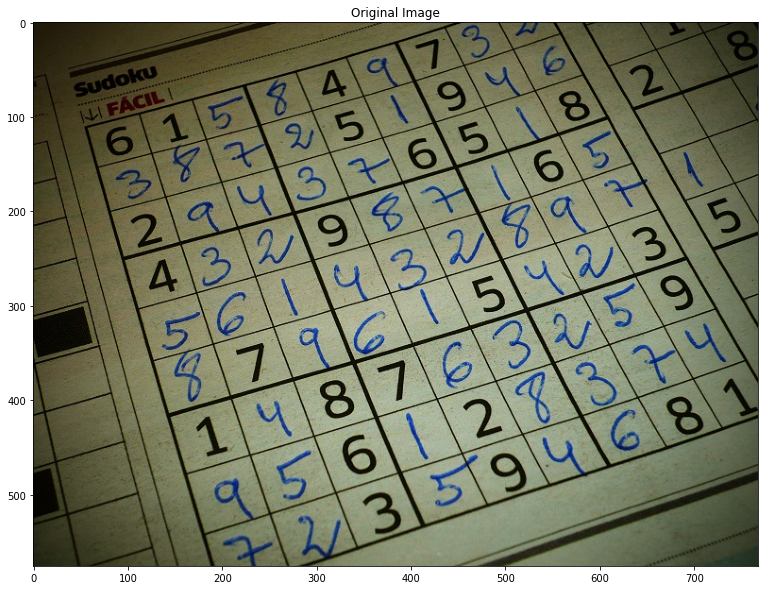

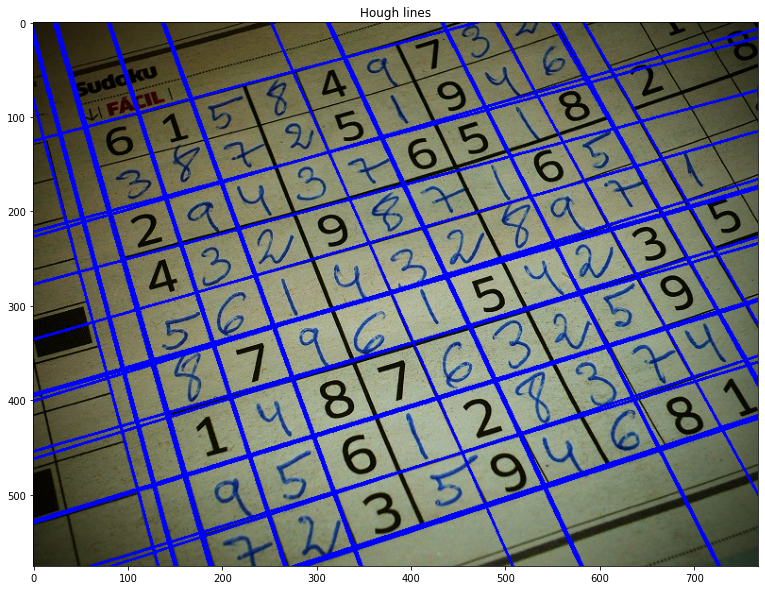

In [3]:
image = cv2.imread("/content/images/soduku.jpg")
imshow("Original Image", image)

# Grayscale and Canny edge extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 100, 170, apertureSize=3)

# Run Hough lines using a rho accuracy of 1 pixel
# Theta accuracy of np.pi/180 which is 1 degree
# our line threshold is set to 240 (no of points on line)
lines = cv2.HoughLines(canny, 1, np.pi/180, 240)

# iterate through each line and convert it into format
# required by cv2.lines (i.e requiring end points)
for line in lines:
  rho, theta = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a * rho
  y0 = b * rho
  x1 = int(x0 + 1000 * (-b))
  y1 = int(y0 + 1000 * (a))
  x2 = int(x0 - 1000 * (-b))
  y2 = int(y0 - 1000 * (a))

  cv2.line(image, (x1, y1), (x2, y2), (255,0,0), 2)

imshow("Hough lines", image)

### Circle Detection - Hough Circles
```
cv2.HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]])
```
**method**: Currently only cv2.HOUGH_GRADIENT is available.

**dp**: Inverse ratio of accumulator resolution.

**minDist**: Minimum distance from the center of detected circles.

  **param1**: Gradient value used in the edge detection.

  **param2**: Accumulator threshold for the cv2.HOUGH_GRADIENT method (lower allows more circles to be detected)

**minRadius**: Limits the smallest circle to this size.

**maxRadius**: Limits the largest circle to this size.



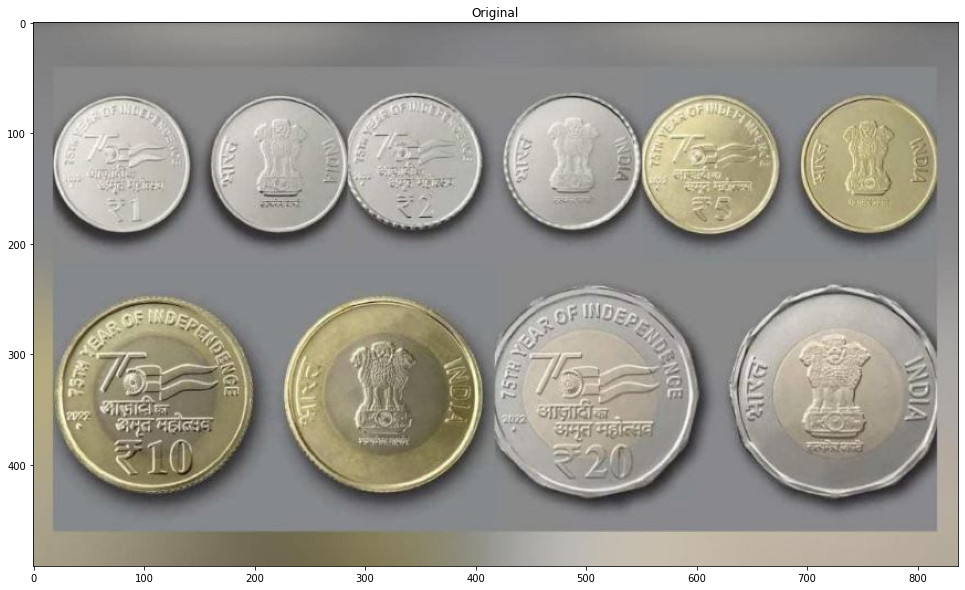

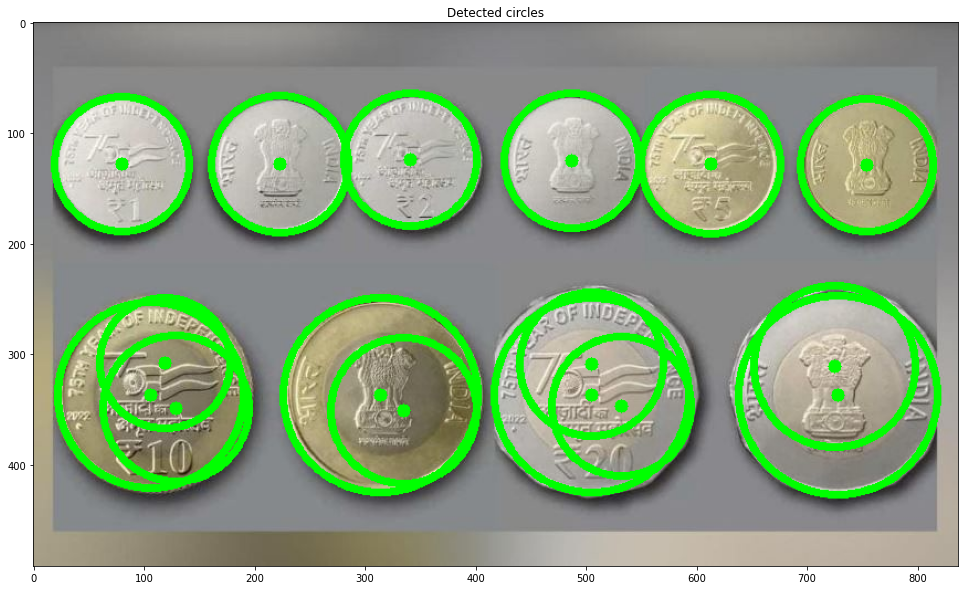

In [11]:
image = cv2.imread("/content/coins.jpg")
imshow("Original", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 25)

cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(image, (i[0], i[1]), i[2], (0,255,0), 5)

  # draw the center of circle
  cv2.circle(image, (i[0], i[1]), 2, (0,255,0), 8)

imshow("Detected circles", image)

## Blob Detection
The function cv2.drawKeypoints takes the following arguments:
cv2.drawKeypoints(input image, keypoints, blank_output_array, color, flags)

flags:

* cv2.DRAW_MATCHES_FLAGS_DEFAULT
* cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
* cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
* cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

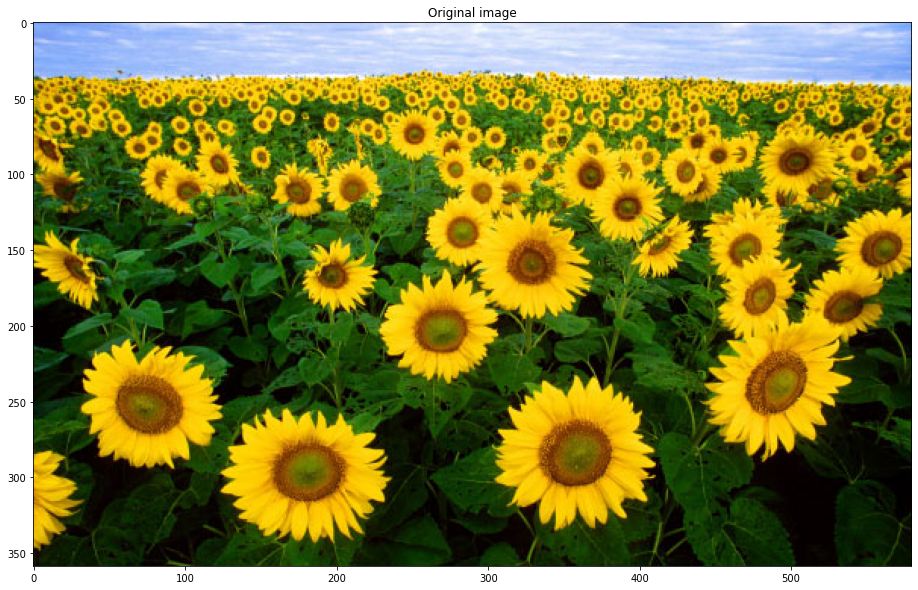

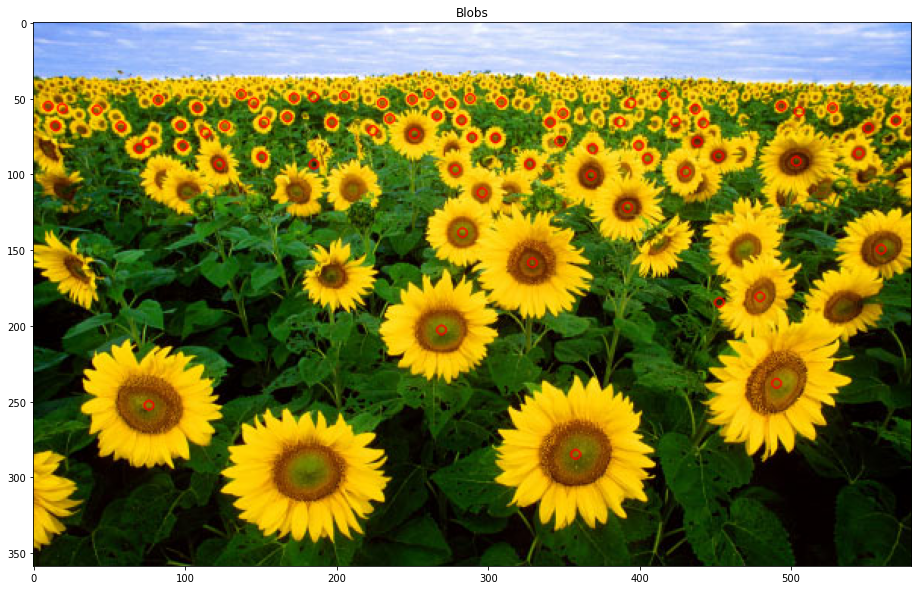

In [13]:
image = cv2.imread("images/Sunflowers.jpg")
imshow("Original image", image)

# set up the detector with default parameters
detector = cv2.SimpleBlobDetector_create()

# detect blobs
keypoints = detector.detect(image)

# Draw detected blobs as red circles
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds the size of the blob
blank = np.zeros((1,1))

blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DEFAULT)
imshow("Blobs", blobs)